## Support Vector Machines

We will study a discriminative model. SVM is very successfull classifier and applicable to many problems.

Pictures and code taken from sources:




### Find a line which separates classes. In higher dimensions, we seek a plane (or curve). ?

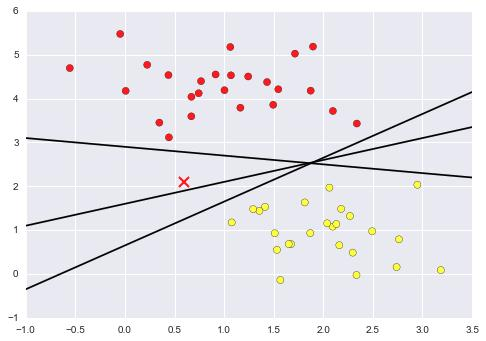

Which line is the best solution? 

SVM says find the best line which has the maximum margin. 


### Linear SVM Classification

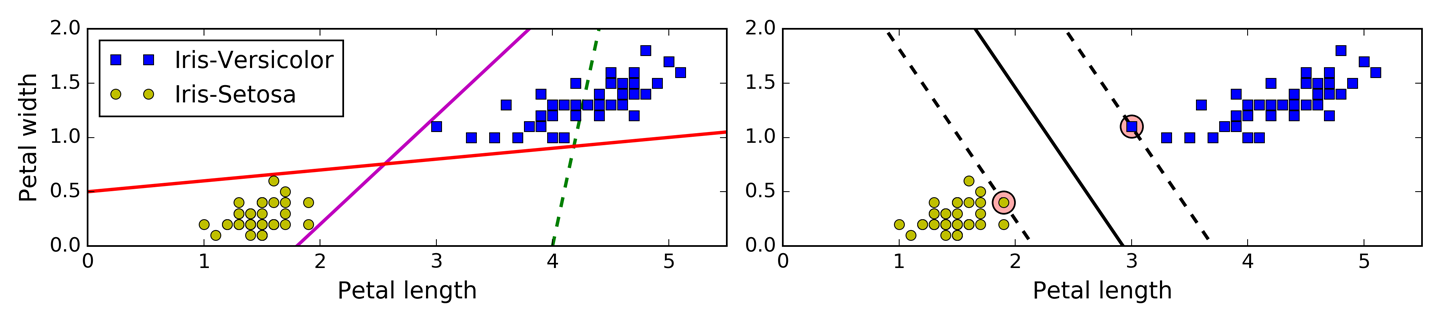
Figure 5-1. Large margin classification

Not only separates the two classes but also stays as far away from the closest training instances as possible.
Widest possible street (represented by the parallel dashed lines) between the classes. This is called **large margin classification.**

Points(vectors) on the edge are called **support vectors.**

**SVMs are sensitive to the feature scales**

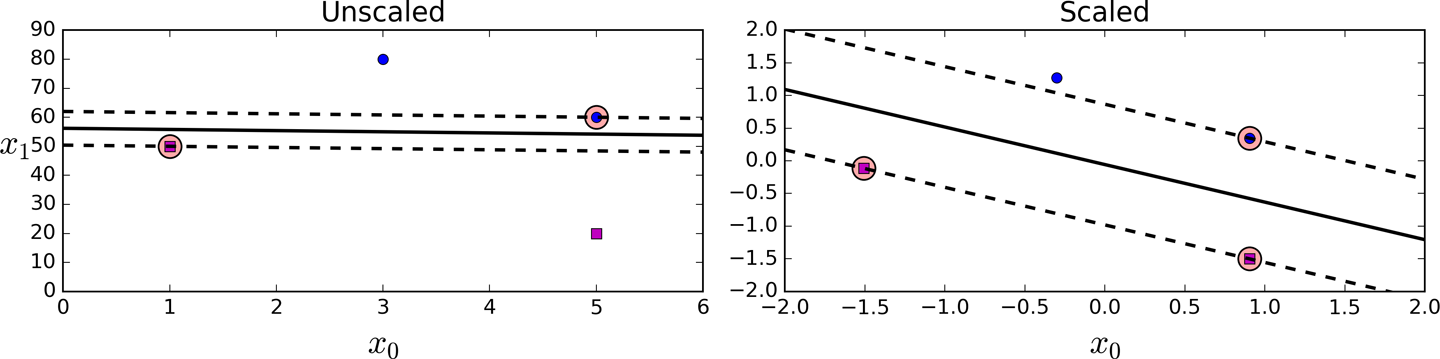

### Soft Margin Classification: 

minimum number samples in between support vectors

In Scikit-Learn’s SVM classes, you can control this balance using the **C hyperparameter**: a smaller C value leads to a wider street but more margin violations. 

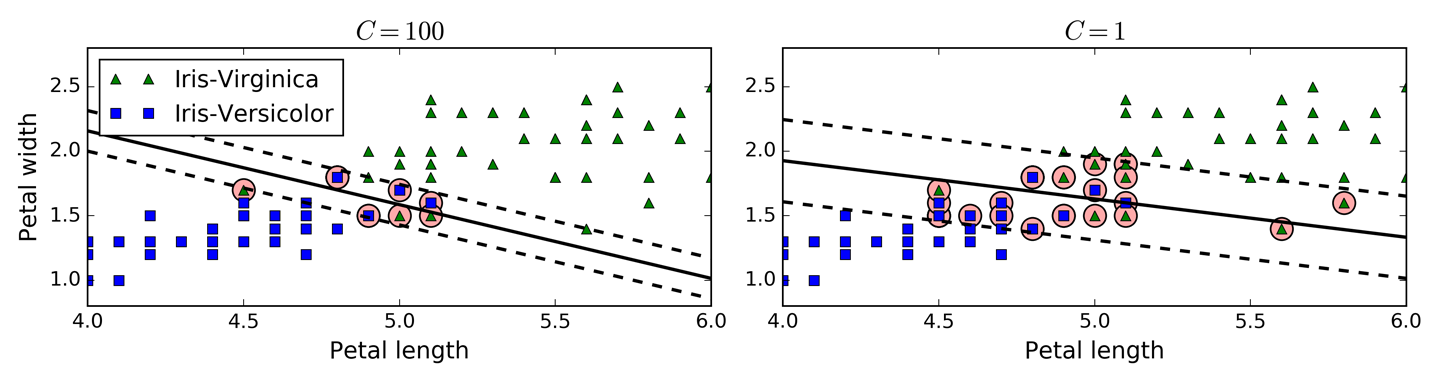

### Outliers

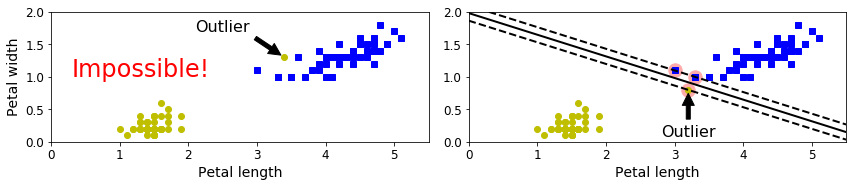

C value can be manually tuned to prevent overfitting! reduce outlier effect

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

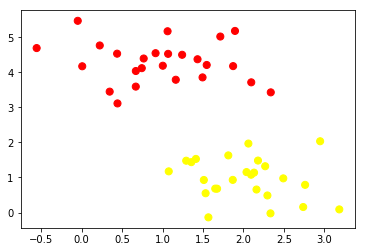

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [3]:
from sklearn.svm import SVC # "Support vector classifier"       model = SVC(kernel='linear', C=1E10)       model.fit(X, y)

In [4]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

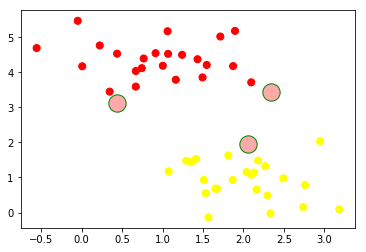

In [5]:
# plt points and also support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
svs = model.support_vectors_
plt.scatter(svs[:, 0],svs[:, 1],s=300, linewidth=1, edgecolors='green', facecolors='#FFAAAA')

In [6]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [7]:
# At the decision boundary, w0*x0 + w1*x1 + b = 0
print("w0,w1:",model.coef_)
print("b:",model.intercept_)
w = model.coef_[0]
b = model.intercept_[0]

w0,w1: [[ 0.23525694 -1.41250783]]
b: [3.29634152]


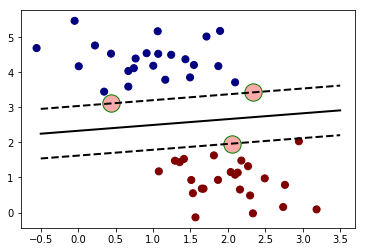

In [8]:
def plt_svm(w,b,svs, xmin=-0.5, xmax=3.5):
    x0 = np.linspace(xmin, xmax, 100)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    # At the decision boundary, x1 = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

# plot with lines
    plt.scatter(svs[:, 0],svs[:, 1],s=300, linewidth=1, edgecolors='green', facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plt_svm(w,b,svs)

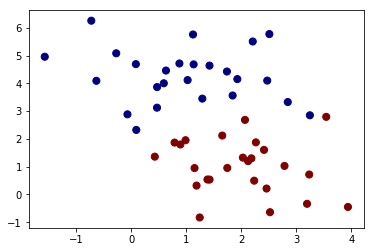

In [9]:
# lets make slightly difficult problem
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=1.00)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [10]:
model = SVC(kernel='linear', C=1e10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

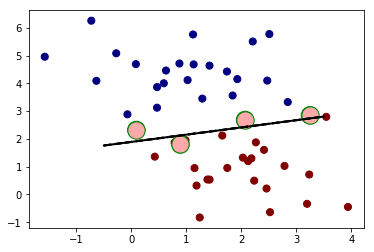

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
svs = model.support_vectors_
plt.scatter(svs[:, 0],svs[:, 1],s=300, linewidth=1, edgecolors='green', facecolors='None')
w = model.coef_[0]
b = model.intercept_[0]
plt_svm(w,b,svs)

In [12]:
# if you change C you will see the margin changes. 

## Sensitivity to feature scales

In [13]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
model = SVC(kernel="linear", C=100)
model.fit(Xs, ys)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

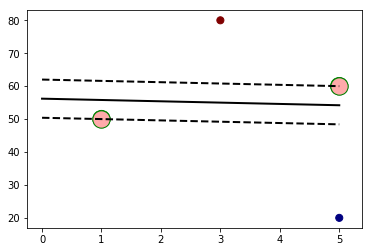

In [14]:
plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, s=50, cmap='jet')
svs = model.support_vectors_
plt.scatter(svs[:, 0],svs[:, 1],s=300, linewidth=1, edgecolors='green', facecolors='None')
w = model.coef_[0]
b = model.intercept_[0]
plt_svm(w,b,svs,xmin=0,xmax=5)

In [15]:
# lets scale features then apply again

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
model.fit(X_scaled, ys)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

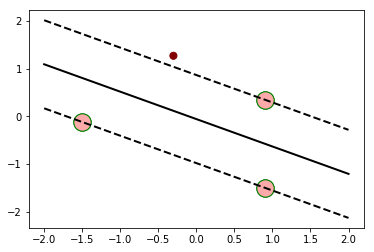

In [16]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=ys, s=50, cmap='jet')
svs = model.support_vectors_
plt.scatter(svs[:, 0],svs[:, 1],s=300, linewidth=1, edgecolors='green', facecolors=None)
w = model.coef_[0]
b = model.intercept_[0]
plt_svm(w,b,svs,xmin=-2,xmax=2)

## Non-linear classification

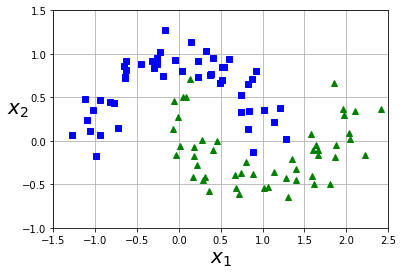

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [18]:
SVC?

In [19]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(C=10,  random_state=42, gamma = 'auto'))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

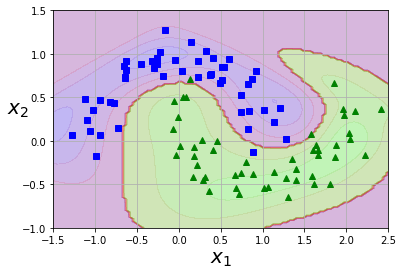

In [20]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [21]:
polynomial_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(C=100, kernel = "poly", degree=3, coef0=1.0, random_state=42, gamma = 'auto'))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=100, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

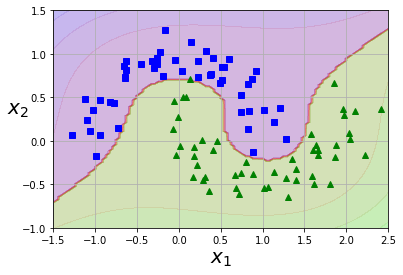

In [22]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### SVC has other kernels, most popular. RBF. 


/home/btek/anaconda2/envs/datamin/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


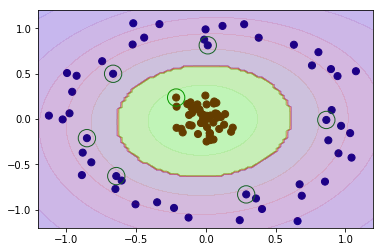

In [23]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel = 'rbf', C=100)
clf.fit(X,y)
print(clf)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=300, lw=1, edgecolors='green', facecolors='none')
plot_predictions(clf,axes=[-1.2,1.2,-1.2,1.2])

**Notes:
- SVC can also make regression. 

## Decision Trees and Random Forests

Decision Trees are tree based classifiers. 

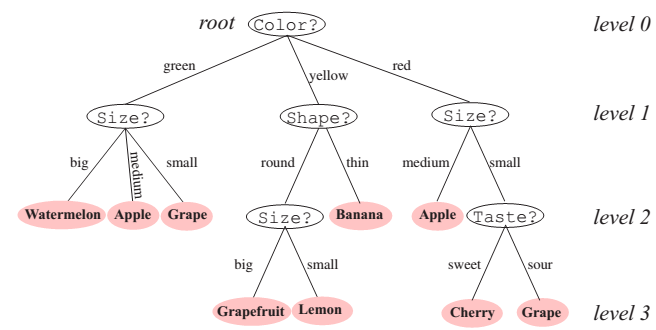



You can sequeantially observe decision. For example you can assist a medical examiner on decision. 
And working on non-numeric features/attributes are easier.

**Can work with both numeric and  non non-numeric features/attributes are easier.**

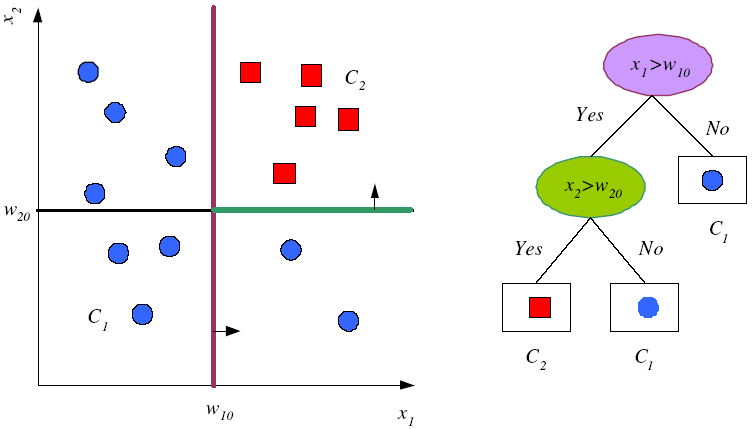

### Non-numeric attributes

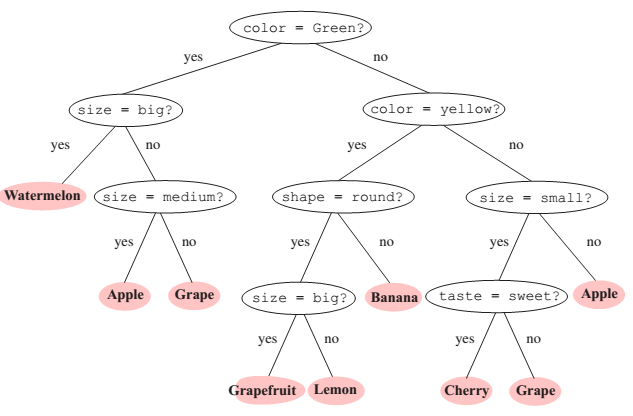

### How to decide which attribute to use in splits?
### PURITY



See below we have 10 instances of the same class.  We would like them to be split into the same branch

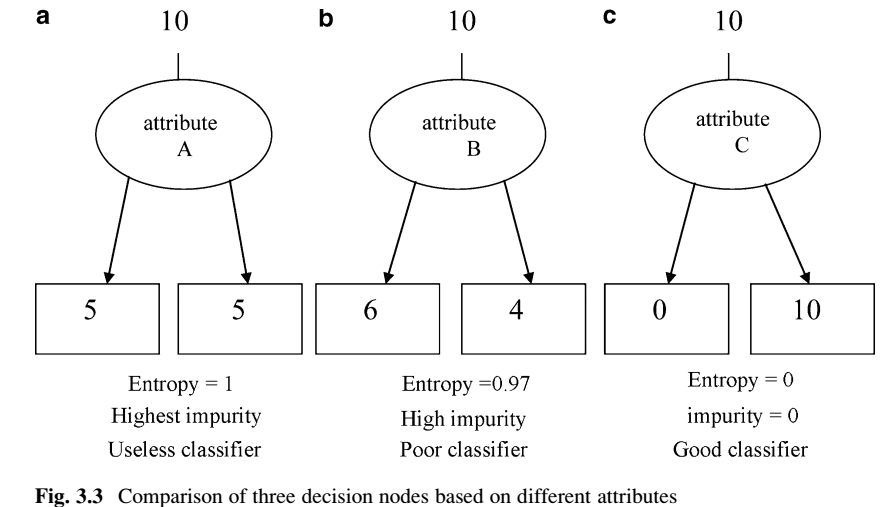


Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children

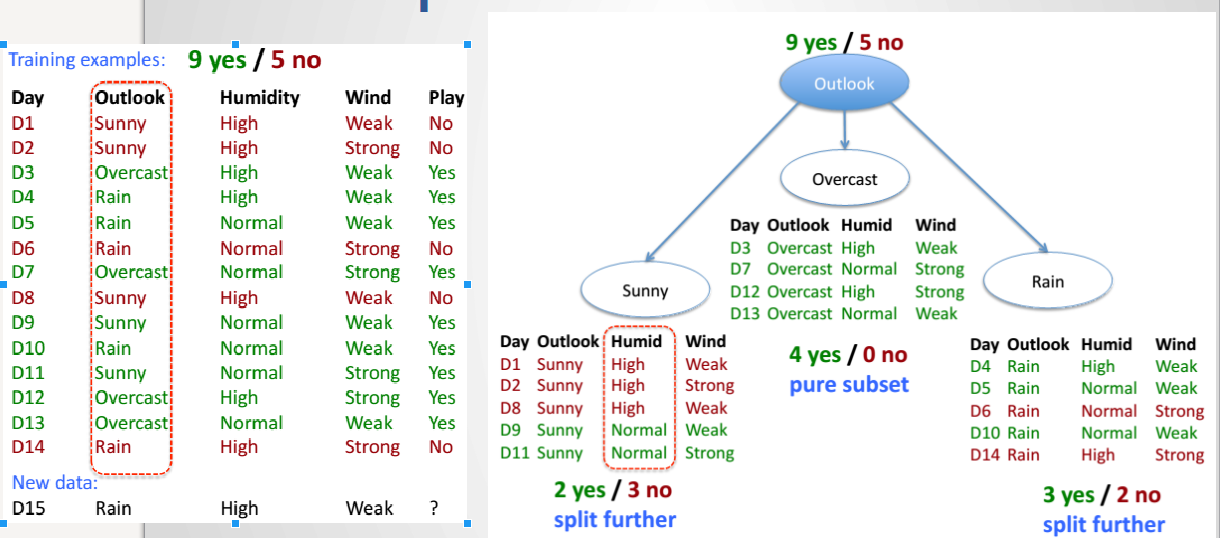

Entropy 

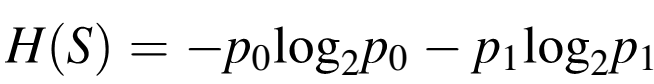

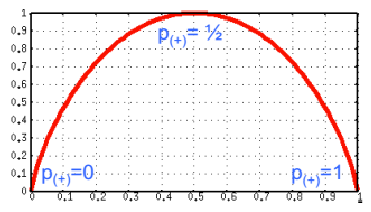

Other impurity 

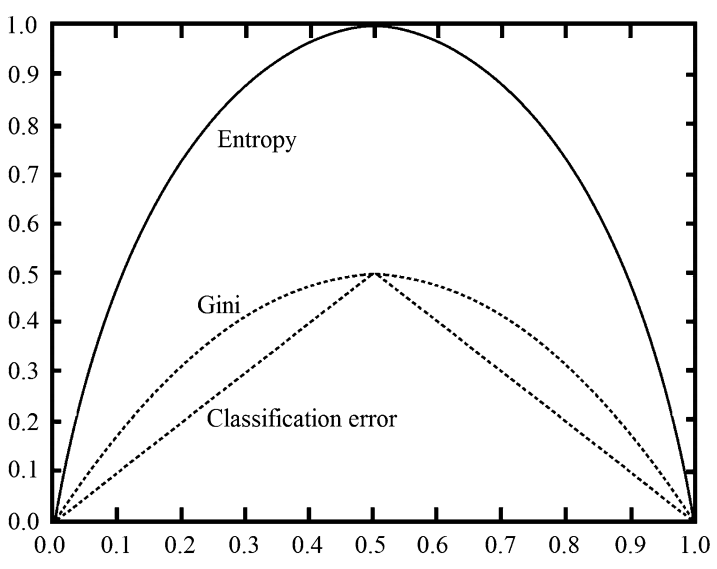

Default criteria for split in sklearn 'Gini'

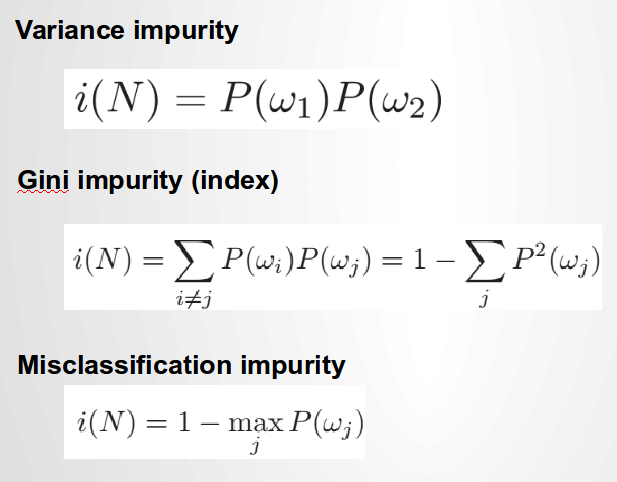



pi,k is the ratio of class k instances among the training instances in the ith node.


## Information Gain

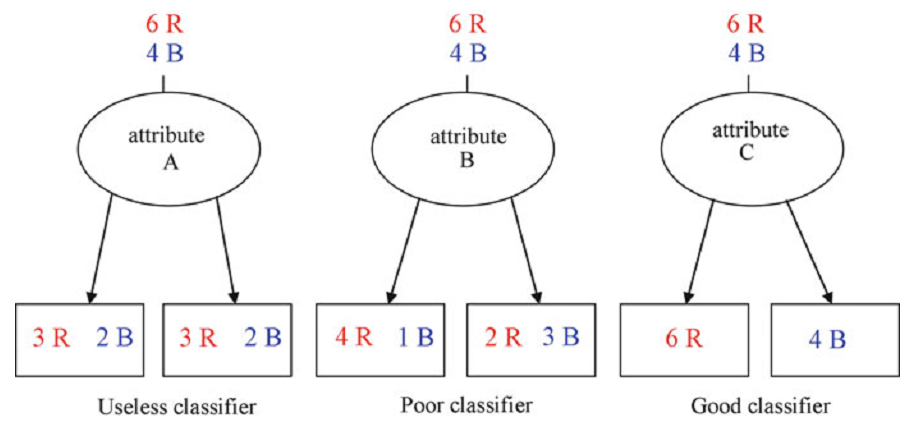

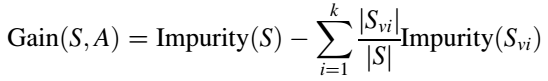

### Training and visualizing with SKLEARN

In [25]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

print(X[0:3,:])
print(y)


[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [26]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [27]:
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [28]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [29]:
!ls

creditRisk.csv
data
histogram_of_image.npy
histogramofimage.npy
Hw1.ipynb
Hw2.ipynb
HW3.ipynb
HW4.ipynb
HW4solved.ipynb
HW5.ipynb
HW BONUS.ipynb
images
img
Introduction.ipynb
iris_tree.dot
lecture2.ipynb
Lecture 3a.ipynb
Lecture 4.ipynb
Lecture 5a Probability & Distributions.ipynb
Lecture 5b Gradient Descent (btek-lt's conflicted copy 2019-03-20).ipynb
Lecture 5b Gradient Descent.ipynb
Lecture 6-Getting Data from Web.ipynb
Lecture 6 Machine Learning.ipynb
Lecture 6 MAchine Learning -Sklearn.ipynb
Lecture 7 ML Models -1 Linear Models-Copy1.ipynb
Lecture 7 ML Models -1 Linear Models.ipynb
Lecture 7 ML Models - Performance Measures & Nearest Neighbour & NAive Bayes-Copy1.ipynb
Lecture 7 ML Models - Performance Measures & Nearest Neighbour & NAive Bayes.ipynb
lecture7priny_files
lecture7priny.html
Lecture 8 Performance Measures, KNN, NAIVE BAYES.ipynb
Lecture 9 SVM, Decision Tree.ipynb
notebook.tex
output_18_1.png
output_30_1.png
output_36_1.png
output_40_2.png
output_41_1.png
output_52_0.

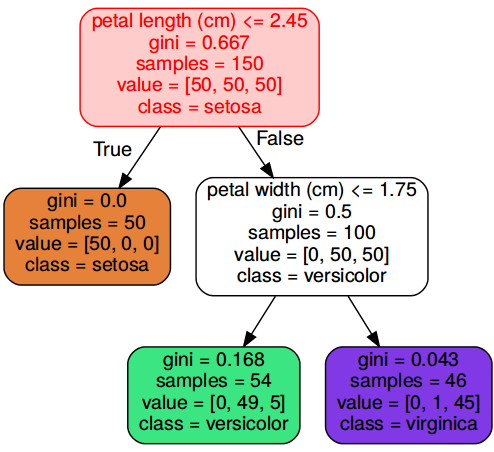

Decision boundary


/home/btek/anaconda2/envs/datamin/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


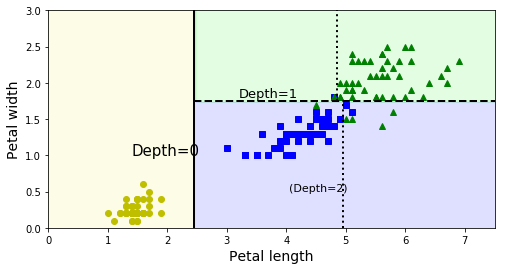

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

In [31]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [32]:
tree_clf.predict([[5, 1.5]])

array([1])

Too deep leaves cause overfitting. Actually decision tree tends to overfit if left unrestricted

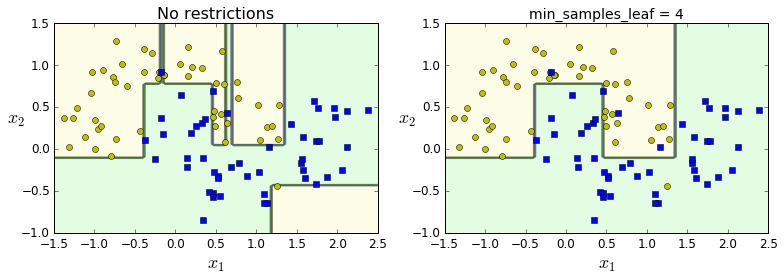

/home/btek/anaconda2/envs/datamin/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)
/home/btek/anaconda2/envs/datamin/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


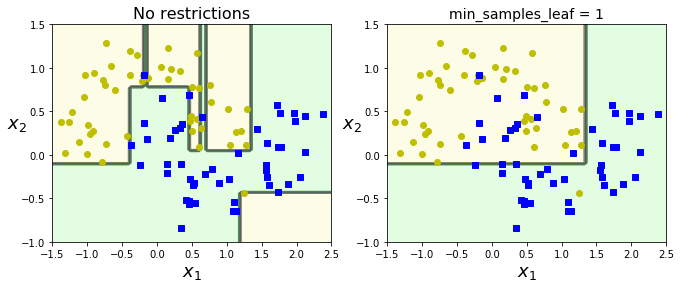

In [36]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
#deep_tree_clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

### Different Tree types

- CART (Classification and Regression Trees) → uses Gini Index(Classification) as metric.
- ID3 (Iterative Dichotomiser 3) → uses Entropy function and Information gain as metrics.

## RANDOM FORESTS

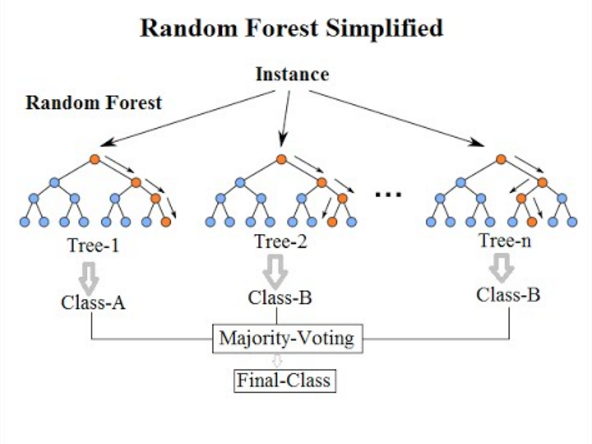

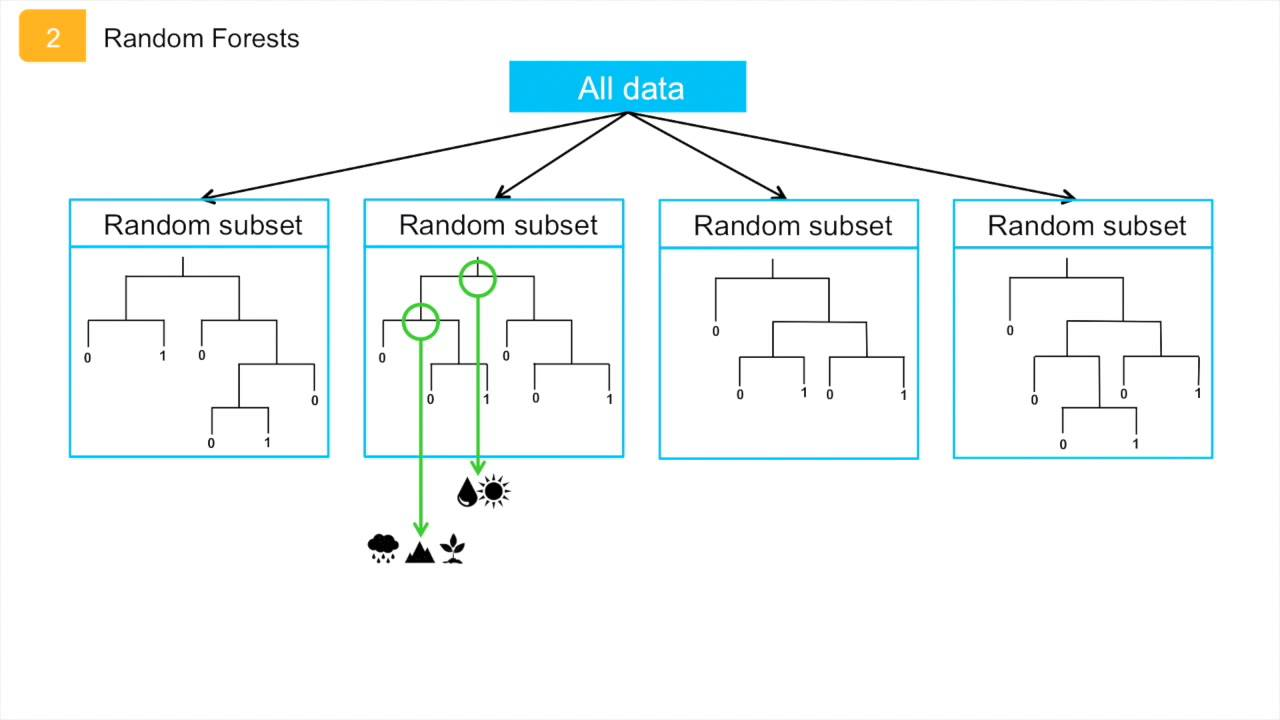

## Algorithm 
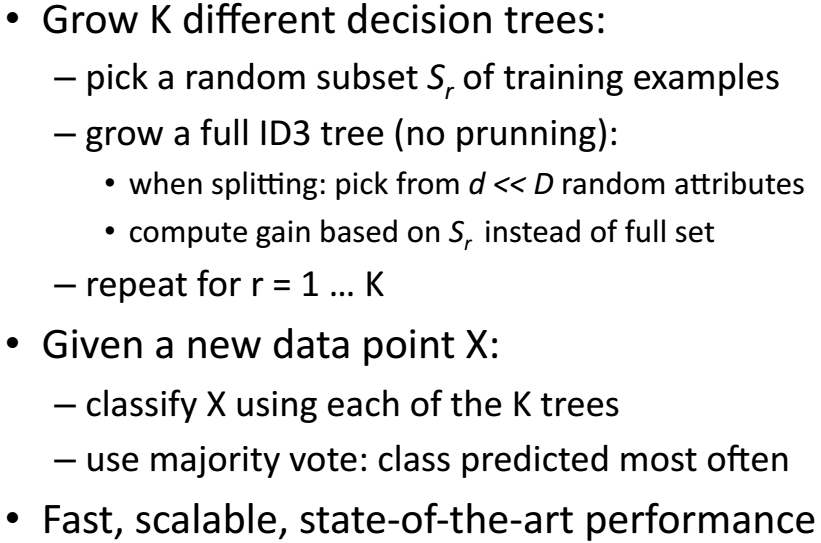